# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/danielraab/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()
print len(df_raw)

400


Answer: 400



#### Question 2. Create a summary table

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of the GRE time series is much larger than the scale of the GPA. The min/max for GRE is 220/800 whereas for GPA it is 2.26 to 4.  


#### Question 4. Drop data points with missing data


In [78]:

df_no_missing=df_raw.dropna(axis=0,how='any')

df_no_missing.count()



admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [79]:
df_only_missing=df_raw[~df_raw.index.isin(df_no_missing.index)]
print df_only_missing


     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN


Answer: Used the inverse of the index for the dropped rows and printed the results.  These results show that there are NaN on three rows only



#### Question 6. Create box plots for GRE and GPA

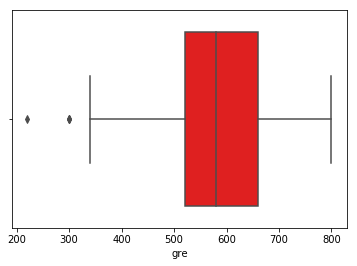

In [117]:
import seaborn as sb

f=sb.boxplot(df_no_missing['gre'],color='red')


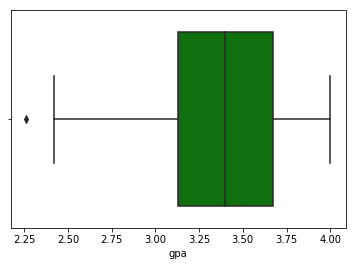

In [115]:
f=sb.boxplot(df_no_missing['gpa'],color='green')


#### Question 7. What do this plots show?

Answer: For the gre series, it shows that most of the scores fall just above 500 and just below 700. It also shows there are some outliers well above and below the range, and that there is a very large range of potential values although not a high frequency at the outer ends of the distribution.

For the gpa series, it shows that the bulk of the scores fall just above 3 and just below 3.75. It also shows a large range from the min to the max.


#### Question 8. Describe each distribution 

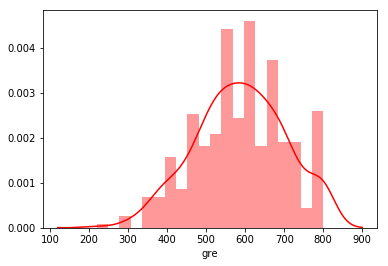

In [135]:
f=sb.distplot(df_no_missing.gre,color='red',bins=20)


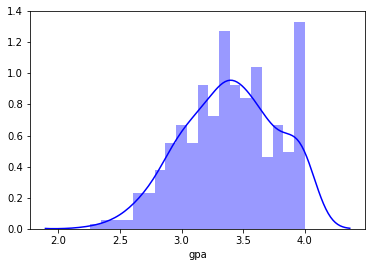

In [134]:
f=sb.distplot(df_no_missing.gpa,color='blue',bins=20)



Both are skewed to the left, with a a long tail at the lower values

In [148]:
#Normality test
import scipy.stats as stats 
#x=stats.norm.rvs(size=100) 

x,y=stats.normaltest(df_no_missing.gre)

z,a=stats.normaltest(df_no_missing.gpa)

print "Normal Test gre:", x,y
print "Normal Test gpa:",z,a

Normal Test gre: 3.81798293061 0.148229806138
Normal Test gpa: 13.0798755609 0.00144457837723


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 
Given that the p value for the gpa test is below 0.05, the gpa data would not qualify as a normal distribution

The gre p value is above .05, and therefore it may qualify as a normal distribution


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer:  The data could use a correction for continuity. We could subtract 0.5 from the lower bound and add 0.5 to the upper bound. 

#### Question 11. Which of our variables are potentially colinear? 

In [162]:
# create a correlation matrix for the data
corr=df_no_missing.corr()

corr

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [168]:
#from sympy import Matrix, pretty

#L=Matrix(corr)

#print L.eigenvals()


#### Question 12. What did you find?

Answer:  gpa and gre have a relatively high correlation which may indicate collinearity



#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:

1) Test correlation of admission rates vs. prestige
2) Test if this correlation is due to random factors
3) Test if other collinear factors are causing the effect which may reduce the value of the prediction based on the prestige factor
4) Generate a random simulation and compare the correlation of that dummy predictor versus the prestige rates as the actual predictor



#### Question 14. What is your hypothesis? 

Answer:
My hypothesis:

Prestige of high school has a strong predictive quality for rates of admission


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data